In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [62]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 24\customer_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [63]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 5880
Total de variables disponibles (columnas) = 21 
Columnas que cuentan con un valor nulo -
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [64]:
df2['Churn'].value_counts()

Churn
No     2982
Yes    2898
Name: count, dtype: int64

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [66]:
# Remplazar por 0 y 1

binario = {'gender': {'Male':1,'Female':0},
          'Partner': {'Yes': 1,'No':0},
       'Dependents': {'No':0,'Yes':1},
     'PhoneService': {'Yes':1,'No':0},
 'PaperlessBilling': {'Yes':1,'No':0},
            'Churn': {'No':0,'Yes':1}}

for column, mapping in binario.items():
  df2[column] = df2[column].map(mapping)

In [67]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,1,0,0,1,23,0,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer,49.85,1146.55,0
1,CUST0001,0,0,1,0,43,0,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,0,Mailed check,100.70,4330.10,1
2,CUST0002,1,1,0,0,51,1,No,DSL,No,...,Yes,Yes,No,No,One year,0,Electronic check,97.33,4963.83,1
3,CUST0003,1,1,0,0,72,1,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,0,Credit card,101.38,7299.36,0
4,CUST0004,1,1,0,0,25,1,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,0,Electronic check,52.22,1305.50,1


In [68]:
# Definir características numéricas y categóricas

numeric_features = ['tenure','MonthlyCharges','TotalCharges']
categorical_features = ['MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features]) # type: ignore

In [70]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = enc.fit_transform(df2[categorical_features])

In [71]:
# Crear DataFrame para las características codificadas
encoded_cats_df = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(categorical_features))
df2 = pd.concat([df2, encoded_cats_df], axis=1)

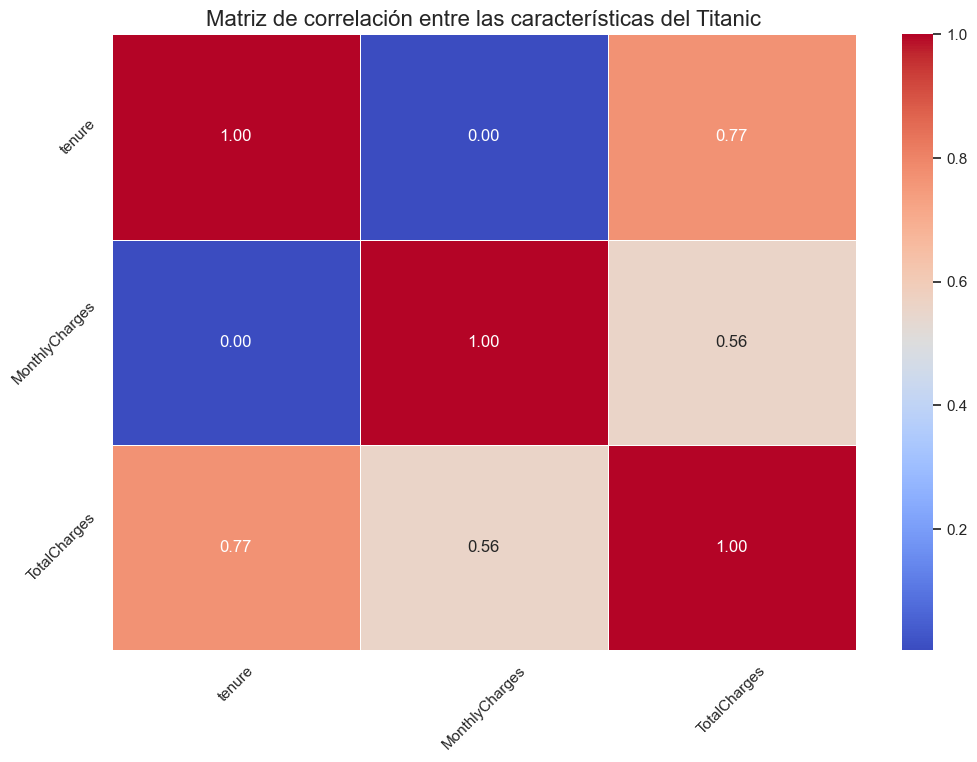

In [72]:

# Seleccionar las columnas para la matriz de correlación
columns_corr = ['tenure','MonthlyCharges','TotalCharges']
matriz_corr = df2[columns_corr].corr()  # Calcula la correlación entre las columnas seleccionadas

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Establecer el estilo de Seaborn
sns.set(style='white')

# Generar el mapa de calor para la matriz de correlación
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Título y ajustes finales
plt.title('Matriz de correlación entre las características del Titanic', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [73]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,CUST0000,1,0,0,1,-0.648040,0,No phone service,No,No internet service,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,CUST0001,0,0,1,0,0.308537,0,No phone service,DSL,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CUST0002,1,1,0,0,0.691167,1,No,DSL,No,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,CUST0003,1,1,0,0,1.695572,1,Yes,DSL,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CUST0004,1,1,0,0,-0.552382,1,Yes,DSL,No,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Predecir

In [74]:
# Definir X e y
X = df2.drop(columns=['customerID','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn'])
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,CUST0000,1,0,0,1,-0.648040,0,No phone service,No,No internet service,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,CUST0001,0,0,1,0,0.308537,0,No phone service,DSL,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CUST0002,1,1,0,0,0.691167,1,No,DSL,No,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,CUST0003,1,1,0,0,1.695572,1,Yes,DSL,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CUST0004,1,1,0,0,-0.552382,1,Yes,DSL,No,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            5880 non-null   object 
 1   gender                                5880 non-null   int64  
 2   SeniorCitizen                         5880 non-null   int64  
 3   Partner                               5880 non-null   int64  
 4   Dependents                            5880 non-null   int64  
 5   tenure                                5880 non-null   float64
 6   PhoneService                          5880 non-null   int64  
 7   MultipleLines                         5880 non-null   object 
 8   InternetService                       5880 non-null   object 
 9   OnlineSecurity                        5880 non-null   object 
 10  OnlineBackup                          5880 non-null   object 
 11  DeviceProtection 

In [77]:
oculta  = tf.keras.layers.Dense(units=10,activation='relu',input_shape=[10])
dropout = tf.keras.layers.Dropout(0.2)
oculta1 = tf.keras.layers.Dense(units=10,activation='relu',input_shape=[10])
dropout1 = tf.keras.layers.Dropout(0.2)
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1])

In [78]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [80]:
print('Comenzando entrenamiento')
historial = modelo.fit(X_train,y_train,epochs=1000,verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento


ValueError: could not convert string to float: 'Yes'